# Part 6B - NLP EDA - Movie Reviews

## Sentiment Analysis and Rating Prediction of Movie Reviews

#### Overview:

This project is an extension of the movies project. This portion focuses on applying Natural Language Processing (NLP) techniques to analyze a dataset of movie reviews. Students will leverage NLP tools such as NLTK, SpaCy, wordcloud, and Scikit-Learn to explore, analyze, and model text data. The ultimate goal is to establish a relationship between the textual content of the reviews and their associated ratings and subsequently predict these ratings.

#### Dataset: TMDB Movie Reviews

[![Image](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1700174921__pastedimage0.png)](https://drive.google.com/file/d/10XnBycJ2bGStZJ2kWoyzZRrInKJlaiYZ/view?usp=sharing)

[TMDB movie reviews](https://drive.google.com/file/d/1vLUzSYleJXqsjNMsq76yTQ5fmNlSHFJI/view?usp=sharing). Ratings range from 1 to 10

- Gathered through the tmdbsimple python wrapper for the TMDB API. To legally cite TMDB, please follow their attribution requirements, which we have [summarized here](https://docs.google.com/document/d/1LzFQDulDdQjiMuZ8sBYeDbHnN62ZWjFU_xt_4eSwVIw/edit?usp=sharing).



- Note: if you have an alternative text classification dataset that you would like to use for this project, **please contact your instructor immediately for approval.**

## Tasks:
<!-- 
**0) Update Your Project 2 Repo**

- Create a new "Data-NLP/" folder in your Project 2 repository.
- Add the downloaded review file to this new Data-NLP folder.

- Make sure you have an "Images/" folder. If not, create one.



**1) Data Preprocessing:**

- Load and inspect the dataset.
    - How many reviews?
    - What does the distribution of ratings look like?
    - Any null values?



- Use the rating column to create a new target column with two groups: high-rating and low-rating groups.
    - We recommend defining "High-rating" reviews as any review with a rating >=9; and "Low-rating" reviews as any review with a rating <=4. The middle ratings between 4 and 9 will be excluded from the analysis.
    - You may use an alternative definition for High and Low reviews, but justify your choice in your notebook/README.



- Utilize NLTK and SpaCy for basic text processing, including:

    - removing stopwords
    - tokenization
    - lemmatization
    - Tips:
        - Be sure to create a custom nlp object and disable the named entity recognizer. Otherwise, processing will take a very long time!
        - **You will want to create several versions of the data, lemmatized, tokenized, lemmatized, and joined back to one string per review, and tokenized and joined back to one string per review.** This will be useful for different analysis and modeling techniques.

    

- Save your processed data frame in a **joblib** file saved in the "Data-NLP/" folder for future modeling.

     -->

**2) EDA and Visualization:**

- Create word clouds to visualize the most frequent and significant words in each group.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your wordclouds as .png files in the "Images/" folder in your repo.**



- Apply nltk's `FreqDist` class to compare the frequency distribution of words in the review groups.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your freq dist plots as .png files in the "Images/" folder in your repo.**



- Perform n-grams analysis (bigrams and trigrams),
    - Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)
    - Focus on bigrams or trigrams, using NLTK's `BigramCollocationFinder` and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.
    - Describe any differences. What do these differences tell you?
    - Save your



- Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

    - Compare the sentiments of high-rating and low-rating texts.

    - Compare the average sentiment scores for high and low-rating reviews.

    - Which review polarity scores don't match the ratings? Why do you think this is?

        

**3) Evaluation and Reporting:**

- Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?
    - List 3 things associated with high-rating reviews
    - List 3 things associated with low-rating reviews.


### Files to Track

In [1]:
import os, sys, joblib
# sys.path.append(os.path.abspath("../NLP/"))
# sys.path.append(os.path.abspath("../"))
# sys.path.append(os.path.abspath("../../"))
%load_ext autoreload
%autoreload 2
    
# import custom_functions as fn
import project_functions as pf

In [2]:
# !pip install -U dojo_ds -q
import dojo_ds as ds
ds.__version__

'1.0.0'

In [3]:
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import os, json
from pprint import pprint
pd.set_option("display.max_columns",50)
# pd.set_option('display.max_colwidth', 250)

fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [4]:

FPATHS_FILE = "config/filepaths.json"

In [5]:
with open(FPATHS_FILE) as f:
    FPATHS = json.load(f)
FPATHS

{'data': {'raw': {'movie-reviews': 'Data-NLP/tmdb-movie-reviews.csv.gz',
   'movie-info': 'Data-NLP/tmdb-movie-info.csv.gz',
   'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
   'processed-joblib': 'Data-NLP/processed-nlp-data.joblib',
   'processed-json': 'Data-NLP/processed-nlp-data.json'},
  'ml': {'train': 'Data-NLP/training-data.joblib',
   'test': 'Data-NLP/testing-data.joblib'},
  'nn': {'train': 'data/training-data-tf/', 'test': 'data/testing-data-tf/'}},
 'models': {'ml': {'bayes': 'Models/bayes-clf.joblib',
   'random_forest': 'Models/random-forest.joblib',
   'logreg': 'Models/log-reg.joblib'},
  'nn': {'LSTM': 'Models/keras/lstm/',
   'GRU': 'Models/keras/gru/',
   'Attention': 'Models/keras/attn/'}},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'eda': {'wordclouds': 'EDA/wordcloud-comparison.png',
  'scattertext': 'EDA/scattertext.html'}}

## Load Data (Options)

- From JSON/joblib
- From AWS

### Opt A) Load from JSON(/joblib)

In [6]:
## If using joblib
# reviews_fpath = FPATHS['data']['raw']['processed-joblib']
# reviews_fpath

In [7]:
# import joblib
# df = joblib.load(reviews_fpath)
# df

In [8]:
## If using json
reviews_fpath = FPATHS['data']['raw']['processed-json']
reviews_fpath

'Data-NLP/processed-nlp-data.json'

In [9]:
df = pd.read_json(reviews_fpath)
# df = df.reset_index(drop=False)
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...
...,...,...,...,...,...,...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear marvel get catch make sure character get ...
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00,Third viewing of this and while not the strong...,"[third, viewing, of, this, and, while, not, th...","[viewing, strongest, mcu, avenger, movies, goo...","[viewing, strong, mcu, avenger, movie, good, p...",third viewing of this and while not the strong...,viewing strongest mcu avenger movies good part...,viewing strong mcu avenger movie good part int...
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I...","[cool, seeing, them, all, together, again, eve...","[cool, seeing, massively, enjoy, good, opinion...","[cool, see, massively, enjoy, good, opinion, a...",cool seeing them all together again even if i ...,cool seeing massively enjoy good opinion aveng...,cool see massively enjoy good opinion

In [10]:
# Check for duplciate review ids
df.duplicated(subset=['review_id']).sum()

0

In [11]:
# Check for duplicated review text
df.duplicated(subset=['review_text']).sum()

4

In [12]:
dup_cols = ['review_text','rating']
df.duplicated(subset=dup_cols).sum()

0

In [13]:
df = df.drop_duplicates(subset=dup_cols)
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...
...,...,...,...,...,...,...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear marvel get catch make sure character get ...
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00,Third viewing of this and while not the strong...,"[third, viewing, of, this, and, while, not, th...","[viewing, strongest, mcu, avenger, movies, goo...","[viewing, strong, mcu, avenger, movie, good, p...",third viewing of this and while not the strong...,viewing strongest mcu avenger movies good part...,viewing strong mcu avenger movie good part int...
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I...","[cool, seeing, them, all, together, again, eve...","[cool, seeing, massively, enjoy, good, opinion...","[cool, see, massively, enjoy, good, opinion, a...",cool seeing them all together again even if i ...,cool seeing massively enjoy good opinion aveng...,cool see massively enjoy good opinion

In [14]:
df.shape

(8965, 12)

In [15]:
df.isna().sum()

movie_id                  0
review_id                 0
rating                 1215
review_text               0
created_at                0
review_text_raw           0
tokens-dirty              0
tokens                    0
lemmas                    0
tokens-dirty-joined       0
tokens-joined             0
lemmas-joined             0
dtype: int64

### Opt B) Load Reviews from AWS RDS

In [16]:
# from custom_functions import aws_mysql
# conn, engine = aws_mysql.connect_to_aws_rds(include_engine=True)
# conn, engine

In [17]:
# ## Test your connection by checking for any tables that exist (there should be none at this point)
# q = """SHOW TABLES;"""
# tables = pd.read_sql(q, conn)
# tables

In [18]:
# q = "SELECT * FROM reviews"
# reviews_sql_df = pd.read_sql(q, conn)
# reviews_sql_df

In [19]:
# reviews_sql_df.duplicated(subset=dup_cols).sum() 

In [20]:
# reviews_sql_df = reviews_sql_df.drop_duplicates(subset=dup_cols)
# reviews_sql_df

In [21]:
# df  = reviews_sql_df.copy()
# df

> NOTE: Now that done with selecting workflow, should prob move duplciate checking code below selecting final df

## Set Groups for EDA

<Axes: >

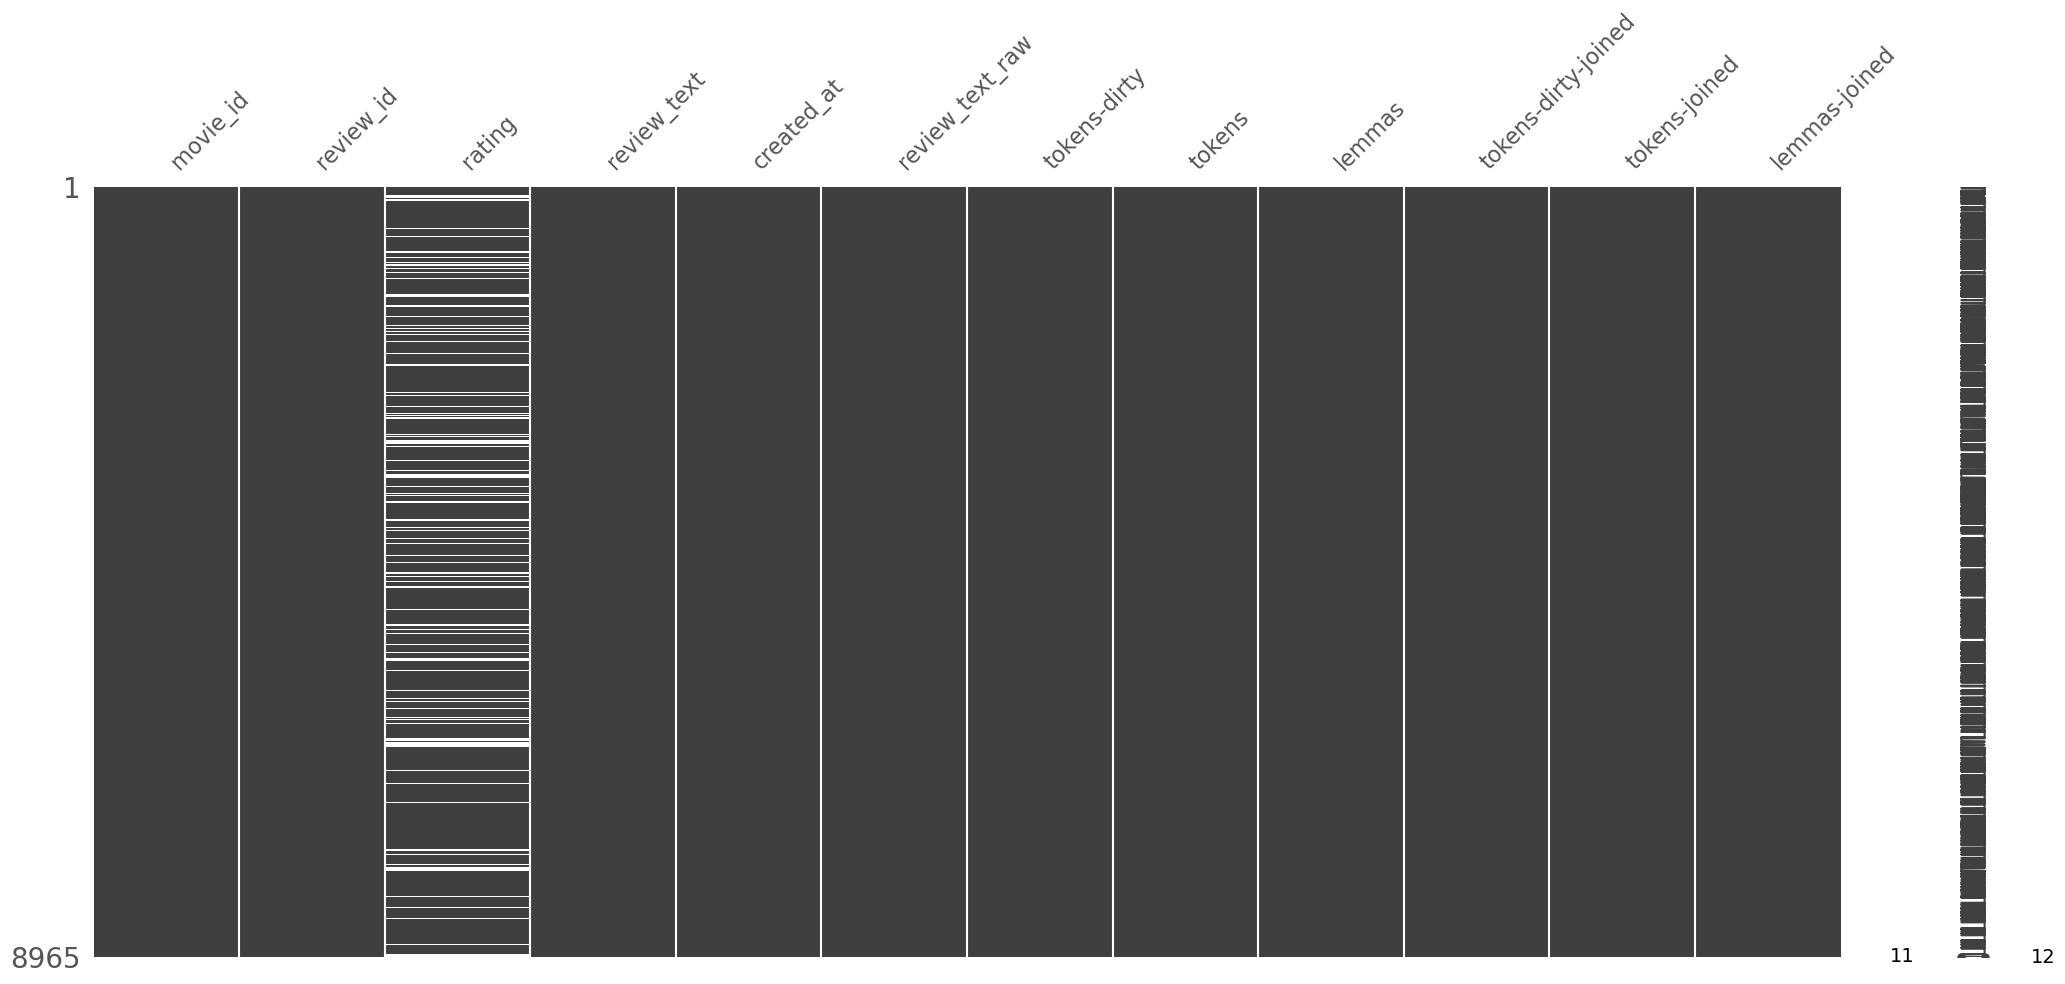

In [22]:
import missingno
missingno.matrix(df)

In [23]:
df.duplicated('review_text').sum()

4

In [24]:
# Dropna and rename columns
df = df.dropna(subset=['review_text'])
df = df.rename({'author_rating':'rating'},axis=1)
df

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty f...,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty f...,"[better, then, the, original, i, think, was, p...","[better, original, think, pretty, funny, thoug...","[well, original, think, pretty, funny, think, ...",better then the original i think was pretty fu...,better original think pretty funny thought com...,well original think pretty funny think comedy ...
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline...,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline...,"[kind, of, boring, it, 's, a, good, plot, and,...","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline...,kind boring good plot storyline interested,kind boring good plot storyline interested
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intend...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intend...","[heartwarming, if, not, as, impactful, as, it,...","[heartwarming, impactful, intends, brother, be...","[heartwarme, impactful, intend, brother, bear,...",heartwarming if not as impactful as it intends...,heartwarming impactful intends brother bear le...,heartwarme impactful intend brother bear leave...
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs ...",2024-01-01 08:10:10.033000+00:00,"""Kenai"" is a young Inuit warrior who disturbs ...","[kenai, is, a, young, inuit, warrior, who, dis...","[kenai, young, inuit, warrior, disturbs, spiri...","[kenai, young, inuit, warrior, disturb, spirit...",kenai is a young inuit warrior who disturbs th...,kenai young inuit warrior disturbs spirits kil...,kenai young inuit warrior disturb spirit kill ...
4,10012,628159c8caa50850dcf93d33,5.0,Seems like an apt title for everything that ha...,2022-05-15 19:51:36.244000+00:00,Seems like an apt title for everything that ha...,"[seems, like, an, apt, title, for, everything,...","[like, apt, title, happened, scenes, justice, ...","[like, apt, title, happen, scene, justice, lea...",seems like an apt title for everything that ha...,like apt title happened scenes justice league ...,like apt title happen scene justice league cos...
...,...,...,...,...,...,...,...,...,...,...,...,...
8960,99861,5e20dedc397df000129666b8,NaN,It's just what I feared. Marvel has gotten so ...,2020-01-16 22:08:28.630000+00:00,It's just what I feared. Marvel has gotten so ...,"[it, 's, just, what, i, feared, marvel, has, g...","[feared, marvel, gotten, caught, making, sure,...","[fear, marvel, get, catch, make, sure, charact...",it 's just what i feared marvel has gotten so ...,feared marvel gotten caught making sure charac...,fear marvel get catch make sure character get ...
8961,99861,5ef819bba284eb00398dc810,7.0,Third viewing of this and while not the strong...,2020-06-28 04:16:59.341000+00:00,Third viewing of this and while not the strong...,"[third, viewing, of, this, and, while, not, th...","[viewing, strongest, mcu, avenger, movies, goo...","[viewing, strong, mcu, avenger, movie, good, p...",third viewing of this and while not the strong...,viewing strongest mcu avenger movies good part...,viewing strong mcu avenger movie good part int...
8962,99861,600616349a358d0040c2ecad,7.0,"Cool seeing them all together again, even if I...",2021-01-18 23:13:56.078000+00:00,"Cool seeing them all together again, even if I...","[cool, seeing, them, all, together, again, eve...","[cool, seeing, massively, enjoy, good, opinion...","[cool, see, massively, enjoy, good, opinion, a...",cool seeing them all together again even if i ...,cool seeing massively enjoy good opinion aveng...,cool see massively enjoy good opinion

movie_id                  0
review_id                 0
rating                 1215
review_text               0
created_at                0
review_text_raw           0
tokens-dirty              0
tokens                    0
lemmas                    0
tokens-dirty-joined       0
tokens-joined             0
lemmas-joined             0
dtype: int64

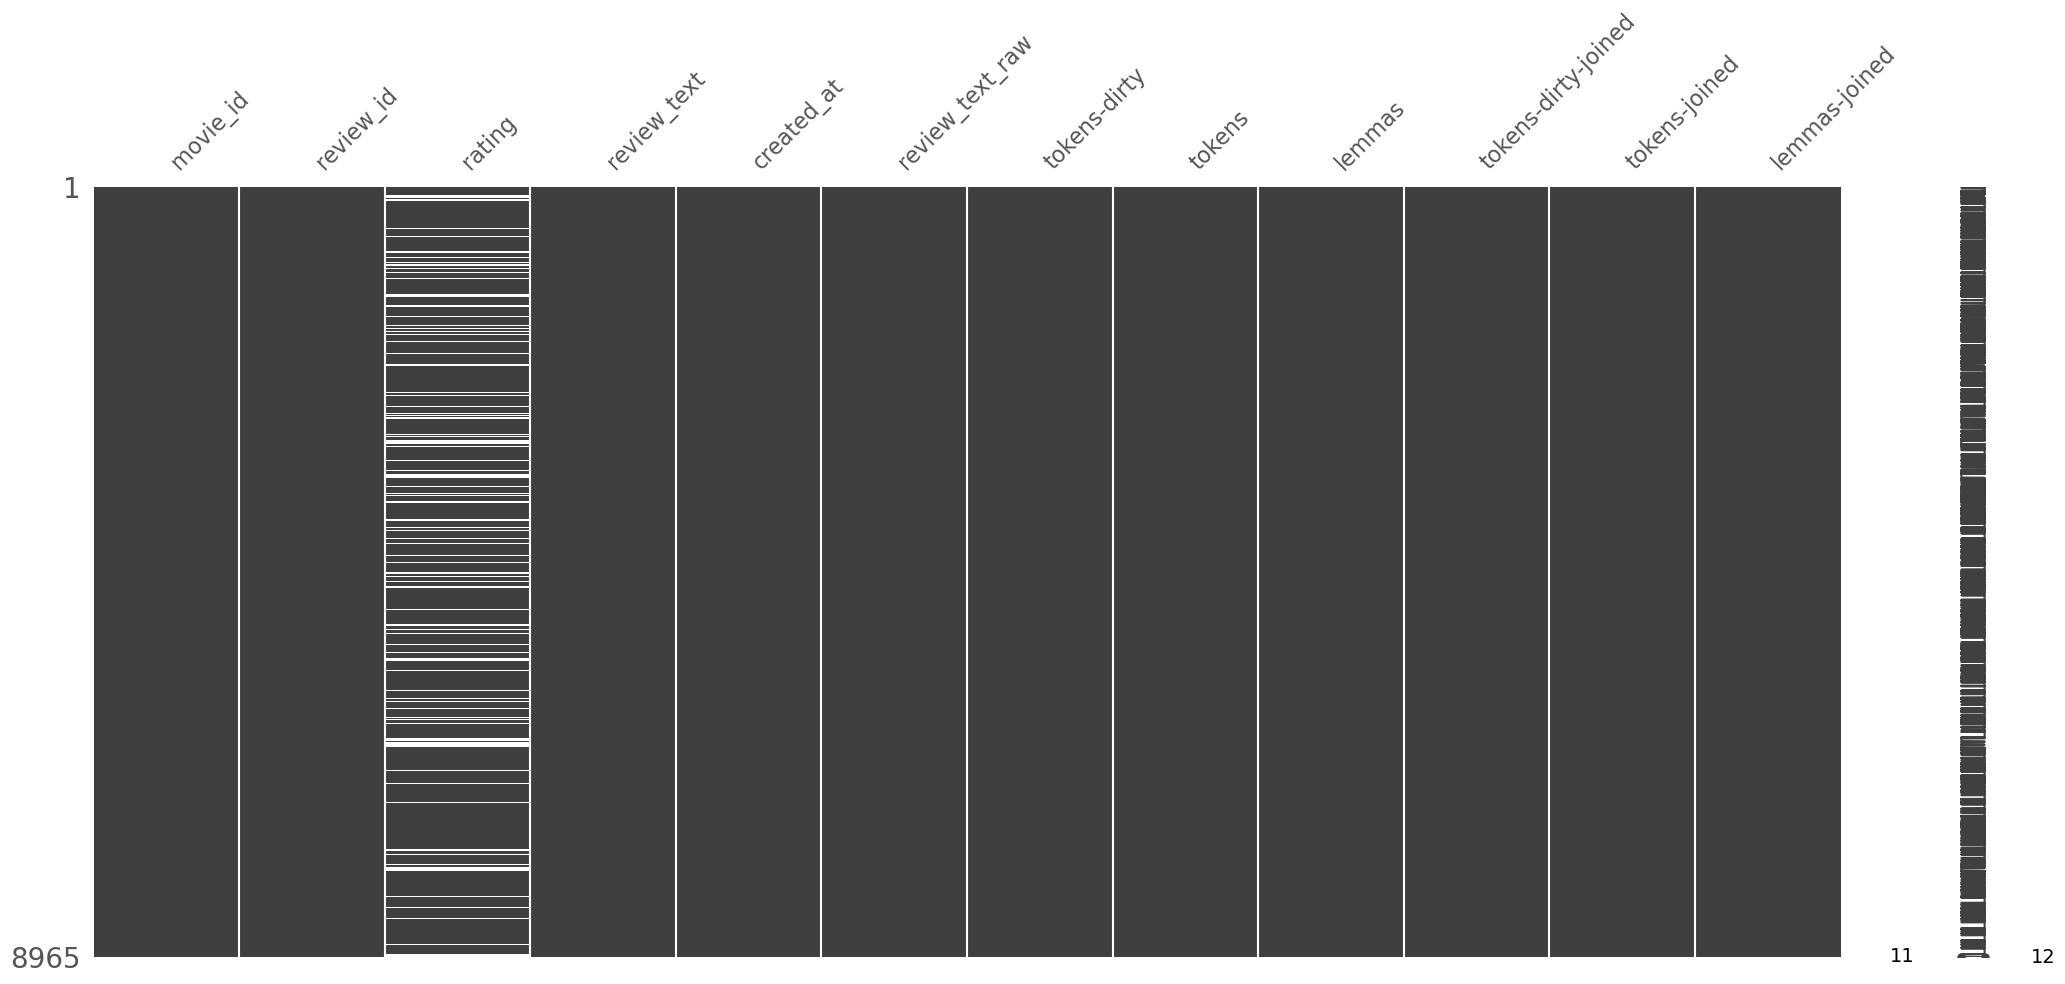

In [25]:
# Check for null values
missingno.matrix(df)
df.isna().sum()

<Axes: >

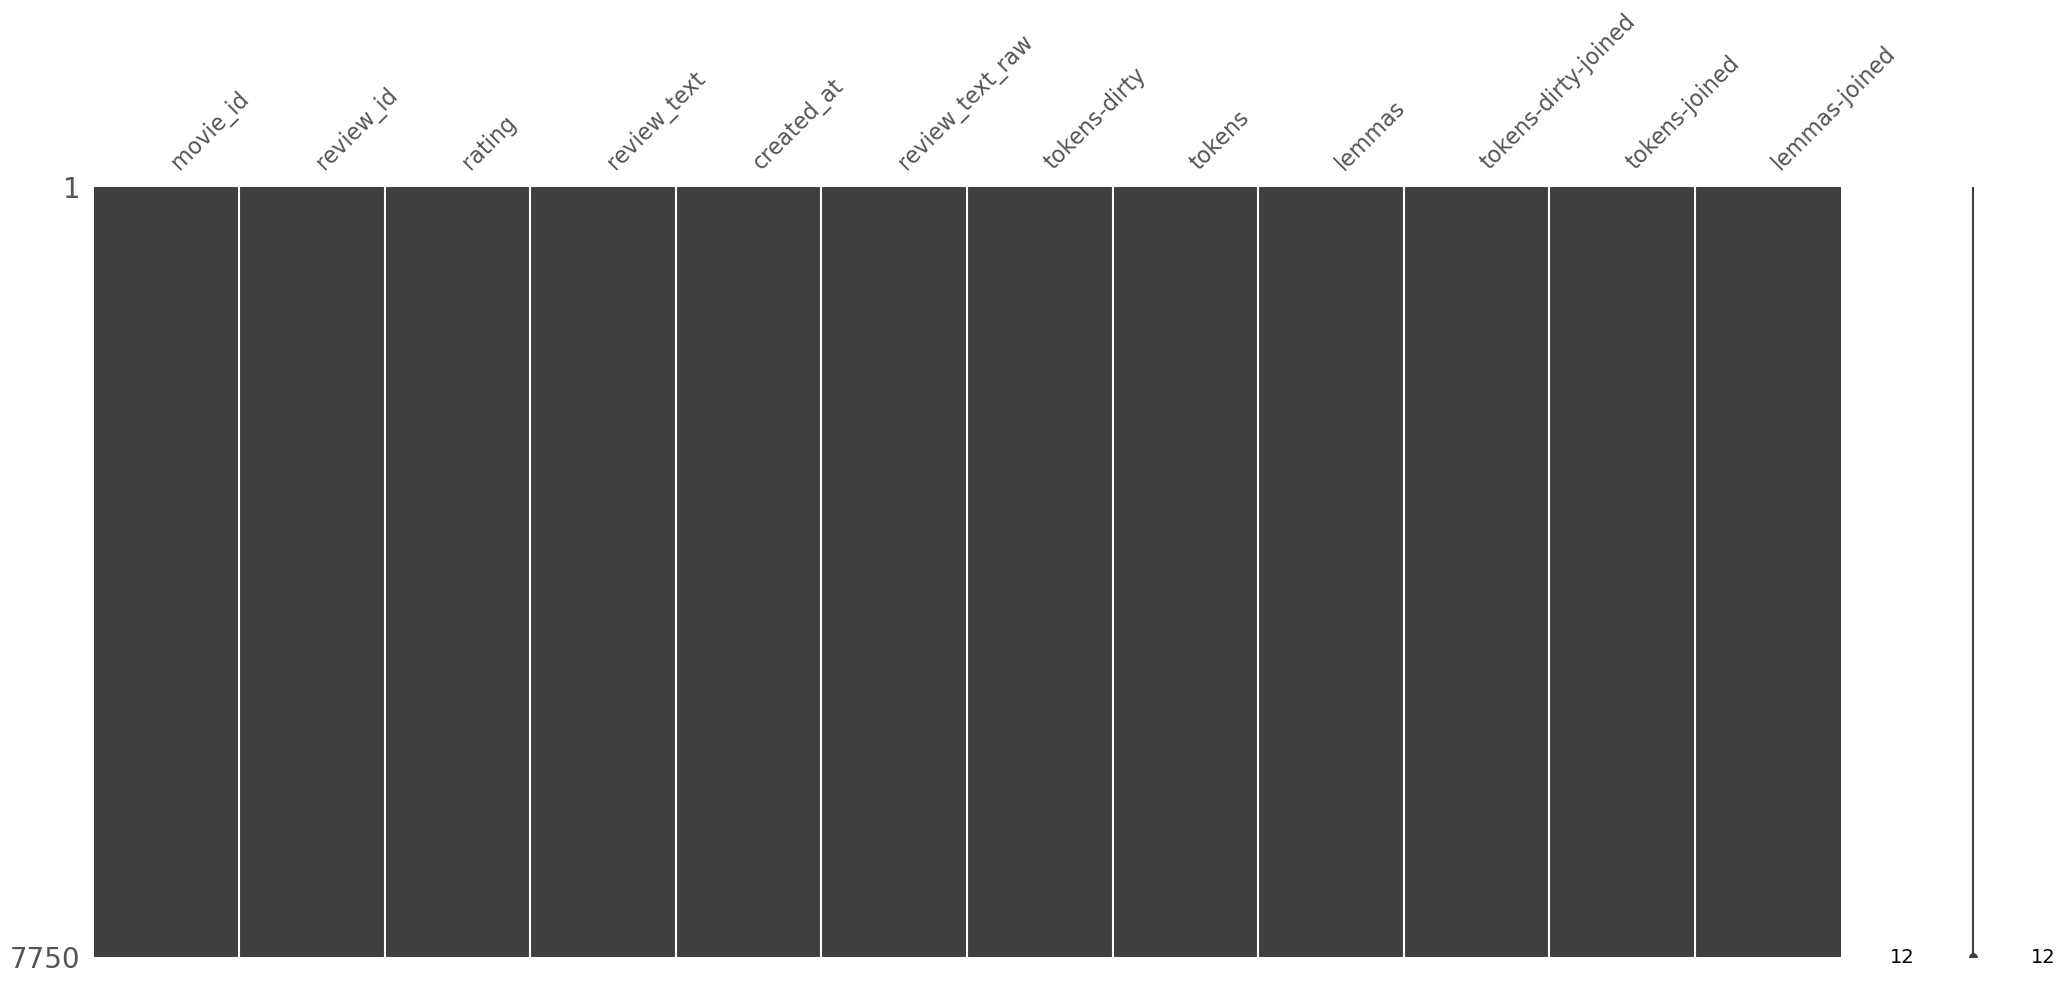

In [26]:
# Dropping reviews without a rating
df = df.dropna(subset=['rating'])
missingno.matrix(df)

### Define Groups - Ratings

<Axes: xlabel='rating', ylabel='Count'>

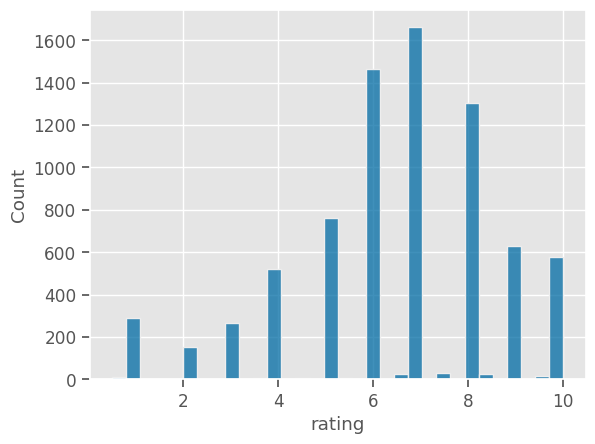

In [27]:
sns.histplot(df['rating'])

- "High Rating": >= 9
- "Low Rating": <= 4

In [28]:
# def set_groups(x):
#     if x >= 7:
#         group = "High"
#     elif x>=5:
#         group="Mid"
#     else:
#         group= "Low'"
#     return group

In [29]:
def set_group_binary(x):
    if x >= 9:
        group = "High"
    elif x<=4:
        group="Low"
    else:
        group = pd.NA
    return group

In [30]:
# df_ml = df.copy()
df['target'] =df['rating'].map(set_group_binary)
df['target'].value_counts(dropna=True, normalize=True)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_25950/2821489903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] =df['rating'].map(set_group_binary)


Low     0.505868
High    0.494132
Name: target, dtype: float64

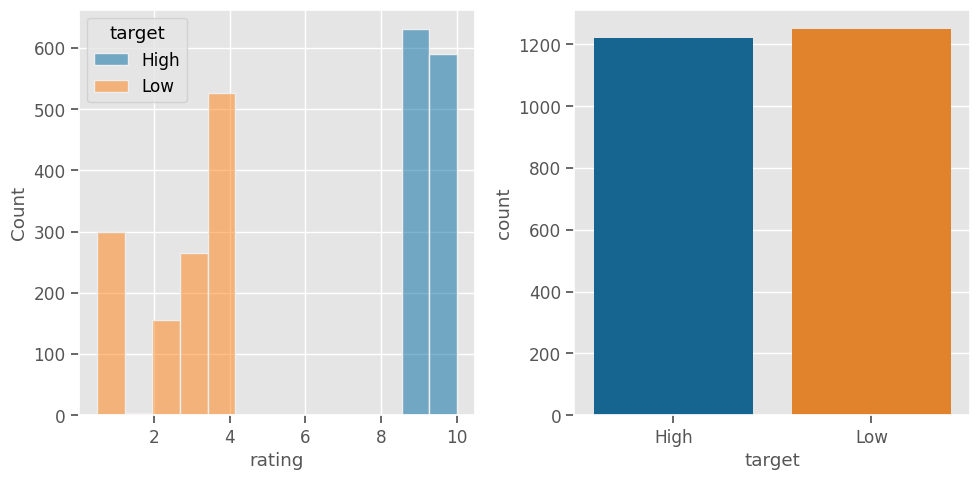

In [31]:
fig, axes =  plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df, x='rating', hue='target', ax=axes[0])
sns.countplot(data=df, x='target', ax=axes[1])
fig.tight_layout()

### NLP Preprocessing

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_25950/558927399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review_text'].map(lambda x: len(x.split()))


[Text(0.5, 1.0, 'Review Lengths (Whitespace Tokens)')]

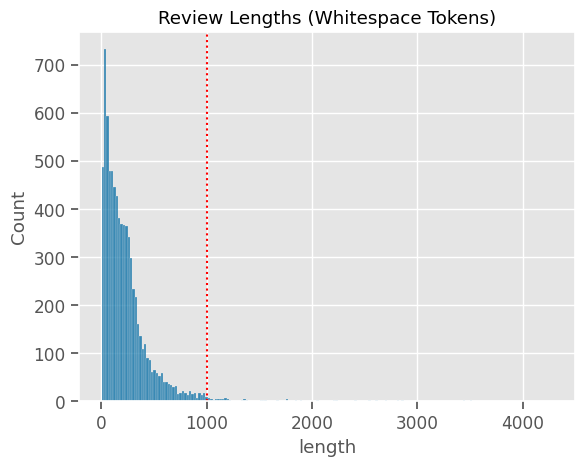

In [32]:
THRESH = 1000
df['length'] = df['review_text'].map(lambda x: len(x.split()))
df = df.copy()
ax = sns.histplot(data=df, x='length')
ax.axvline(THRESH, color='red', ls=':');
ax.set(title='Review Lengths (Whitespace Tokens)')

# Part 2) EDA and Visualization

**2) EDA and Visualization:**

- Create word clouds to visualize the most frequent and significant words in each group.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your wordclouds as .png files in the "Images/" folder in your repo.**



- Apply nltk's `FreqDist` class to compare the frequency distribution of words in the review groups.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your freq dist plots as .png files in the "Images/" folder in your repo.**



- Perform n-grams analysis (bigrams and trigrams),
    - Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)
    - Focus on bigrams or trigrams, using NLTK's `BigramCollocationFinder` and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.
    - Describe any differences. What do these differences tell you?
    - `Save your...`?



- Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

    - Compare the sentiments of high-rating and low-rating texts.

    - Compare the average sentiment scores for high and low-rating reviews.

    - Which review polarity scores don't match the ratings? Why do you think this is?

        

**3) Evaluation and Reporting:**

- Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?
    - List 3 things associated with high-rating reviews
    - List 3 things associated with low-rating reviews.

> Adding imports as-if standalone notebook

In [33]:
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

import spacy
# nlp_custom = fn.nlp.make_custom_nlp(disable=['ner','parser'],contractions=[],
#                             stopwords_to_add=["★"])
# nlp_custom
# # Disable parser and ner
# # nlp_light = spacy.load("en_core_web_sm", disable=['parser','ner'])

## Checking for Bad Reviews (HTML)

- There were URLs and html tags in the bigrams/trigrams (PMI).
- Checking for and removing reviews that contain these artificats (if we can afford to drop)

### `ADMIN TO DO`:
>- Discuss with Brenda if should warn students.

In [34]:
filter_http = df['review_text'].str.contains('http')
filter_http.sum()

0

In [35]:
filter_hrefs = df['review_text'].str.contains('href')
filter_hrefs.sum()

0

In [36]:
(filter_http | filter_hrefs).sum()

0

## 📌 BOOKMARK 01/22/24 `MOVE TO PREVIOUS NOTEBOOK 6A`
- To DO:
    - See if the reviews with html are usable if the tags are removed via regular expressions.

### Removing HTML with Regex

In [37]:
df['review_text_raw'] = df['review_text'].copy()

In [38]:
df.loc[df['review_text'].str.contains('http')]


,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,target,length


In [39]:
# Checking for raw html
df.loc[df['review_text'].str.contains('<')]

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,target,length
3603,335984,59e8ac0ac3a36827f401269f,4.0,The film was actually rather disappointing. As...,2017-10-19 13:43:38.573000+00:00,The film was actually rather disappointing. As...,"[the, film, was, actually, rather, disappointi...","[film, actually, disappointing, film, ok, sequ...","[film, actually, disappointing, film, ok, sequ...",the film was actually rather disappointing as ...,film actually disappointing film ok sequel bla...,film actually disappointing film ok sequel bla...,Low,84
5817,502356,646bbf8ed1857201802df9c0,10.0,SOOOOO FIRE I LOVEEEE MARIO PLEEASE MAKE ANOTH...,2023-05-22 19:16:30.951000+00:00,SOOOOO FIRE I LOVEEEE MARIO PLEEASE MAKE ANOTH...,"[sooooo, fire, i, loveeee, mario, pleease, mak...","[sooooo, fire, loveeee, mario, pleease, love, ...","[sooooo, fire, loveeee, mario, pleease, love, ...",sooooo fire i loveeee mario pleease make anoth...,sooooo fire loveeee mario pleease love mario <3,sooooo fire loveeee mario pleease love mario <3,High,13
6316,544402,5cfb5bd3c3a3680b4e2757d7,8.0,One of the best Pakistani Rom-Coms <3,2019-06-08 06:55:15.982000+00:00,One of the best Pakistani Rom-Coms <3,"[one, of, the, best, pakistani, rom, coms, <3]","[best, pakistani, rom, coms, <3]","[good, pakistani, rom, coms, <3]",one of the best pakistani rom coms <3,best pakistani rom coms <3,good pakistani rom coms <3,<NA>,7
8923,9986,58ebb44c925141351f04e15b,9.0,This is a lovely film :) Julia Roberts is love...,2017-04-10 16:35:24.892000+00:00,This is a lovely film :) Julia Roberts is love...,"[this, is, a, lovely, film, julia, roberts, is...","[lovely, film, julia, roberts, lovely, eponymo...","[lovely, film, julia, roberts, lovely, eponymo...",this is a lovely film julia roberts is lovely ...,lovely film julia roberts lovely eponymous cha...,lovely film julia roberts lovely eponymous cha...,High,48


In [40]:
# import re

# # Regular expression to match HTML tags
# regex_html = r"<[^>]*>"

# # Apply the regex to the DataFrame column using str.replace
# df['review_text'] = df['review_text'].str.replace(regex_html, '', regex=True)
# df

In [41]:
# Compare original with cleaned
compare_cols = ['review_text_raw','review_text']

pd.set_option('display.max_colwidth',250)

In [42]:
df.loc[df['review_text_raw'].str.contains('<'), compare_cols]

,review_text_raw,review_text
3603,"The film was actually rather disappointing. As a film it was OK, but as a sequel to Blade Runner, it was terrible. There were some nice in-jokes and references, but overall low-brow junk masquerading as high-brow gold (it was directed by Villeneu...","The film was actually rather disappointing. As a film it was OK, but as a sequel to Blade Runner, it was terrible. There were some nice in-jokes and references, but overall low-brow junk masquerading as high-brow gold (it was directed by Villeneu..."
5817,SOOOOO FIRE I LOVEEEE MARIO PLEEASE MAKE ANOTHER I LOVE YOU MARIO <3,SOOOOO FIRE I LOVEEEE MARIO PLEEASE MAKE ANOTHER I LOVE YOU MARIO <3
6316,One of the best Pakistani Rom-Coms <3,One of the best Pakistani Rom-Coms <3
8923,"This is a lovely film :) Julia Roberts is lovely as the eponymous character, Dakota Fanning is a delightful Fern, and Dominic Scott Kay is an adorable Wilbur- if you see the special features, he does come across as quite a shy little boy\r\n\r\nL...","This is a lovely film :) Julia Roberts is lovely as the eponymous character, Dakota Fanning is a delightful Fern, and Dominic Scott Kay is an adorable Wilbur- if you see the special features, he does come across as quite a shy little boy\r\n\r\nL..."


### Replace Links with `[LINK]`

In [43]:
# regex_url = "https?:\/\/(?:www\.)?[^\s]+"
# df.loc[df['review_text'].str.contains(regex_url), compare_cols]

In [44]:
# df['review_text'] = df['review_text'].str.replace(regex_url, '[LINK]', regex=True)
# df

In [45]:
df.loc[df['review_text_raw'].str.contains('http'), compare_cols]

,review_text_raw,review_text


### Add back code to save updated df?
- Or add to notebook 6A

In [46]:
# raise Exception("replace below code with codealone adv ml wk01")

In [47]:
# FPATHS['data']

In [48]:
# joblib.dump(df, fname_data_joblib)

## WordClouds

In [49]:
df['target'].value_counts(1)

Low     0.505868
High    0.494132
Name: target, dtype: float64

In [50]:
filter_low = df['target'] == "Low"
filter_high = df['target'] == "High"
filter_low.sum(), filter_high.sum()

(1250, 1221)

In [51]:
high_reviews_text = " ".join( df.loc[filter_high, 'review_text'])
high_reviews_text[:100]

'Very enertaining movie. Action, adventure, comedy with a great story. Enjoyable for the whole family'

In [52]:
low_reviews_text = " ".join( df.loc[filter_low, 'review_text'])
low_reviews_text[:100]

"Get Rich or Die Tryin' reminds me of the apocryphal Chinese curse 'may you live in interesting times"

In [53]:
# df.head()

In [54]:

# Make a single giant string with entire groups tokens
high_reviews_tokens = " ".join( df.loc[filter_high, 'tokens-joined'])
low_reviews_tokens = " ".join( df.loc[filter_low, 'tokens-joined'])

high_reviews_lemmas =  " ".join( df.loc[filter_high, 'lemmas-joined'])
low_reviews_lemmas =  " ".join( df.loc[filter_low, 'lemmas-joined'])

In [55]:
# Create lists of all lemmas in both high and low review groups
# Create lists of all lemmas in both high and low review groups
high_review_tokens_list = df.loc[filter_high, 'tokens'].explode().to_list()
low_review_tokens_list = df.loc[filter_low, 'tokens'].explode().to_list()

high_review_lemmas_list = df.loc[filter_high, 'lemmas'].explode().to_list()
low_review_lemmas_list = df.loc[filter_low, 'lemmas'].explode().to_list()

In [56]:
from wordcloud import WordCloud, STOPWORDS

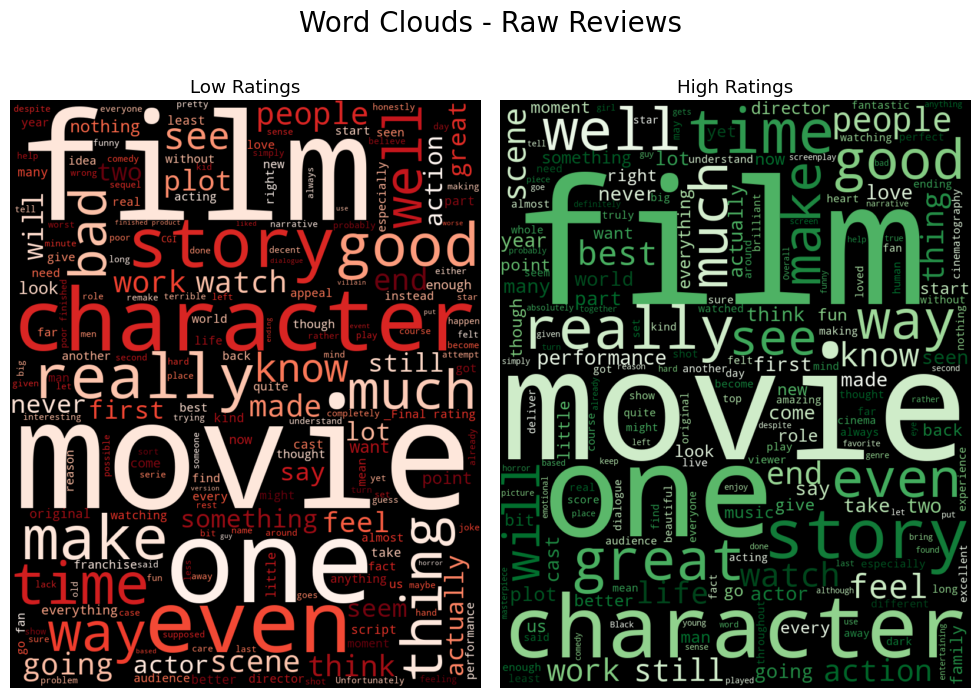

In [57]:
# Make word clouds of raw text
custom_stopwords = [*STOPWORDS]#, 'film','movie']
# Create an instance of a WordCloud and use the generate method
low_cloud = WordCloud(random_state = 42,
                      width = 800,
                      height = 1000,
                      min_word_length = 2, colormap="Reds",
                      stopwords=custom_stopwords,
                     ).generate(low_reviews_text)
high_cloud = WordCloud(random_state = 42,
                       width = 800,
                       height= 1000,
                       min_word_length = 2,
                       colormap="Greens",
                       stopwords=custom_stopwords,
                      ).generate(high_reviews_text)
# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
axes[0].imshow(low_cloud, interpolation='bilinear')
axes[0].set_title("Low Ratings")
axes[1].imshow(high_cloud, interpolation='bilinear')
axes[1].set_title("High Ratings")
[ax.axis('off') for ax in axes]
fig.tight_layout();
fig.suptitle('Word Clouds - Raw Reviews', fontsize=20, y=1.05);
fig.savefig(FPATHS['eda']['wordclouds'], dpi=300, transparent=False, bbox_inches='tight')

## FreqDist

In [58]:
from nltk import FreqDist

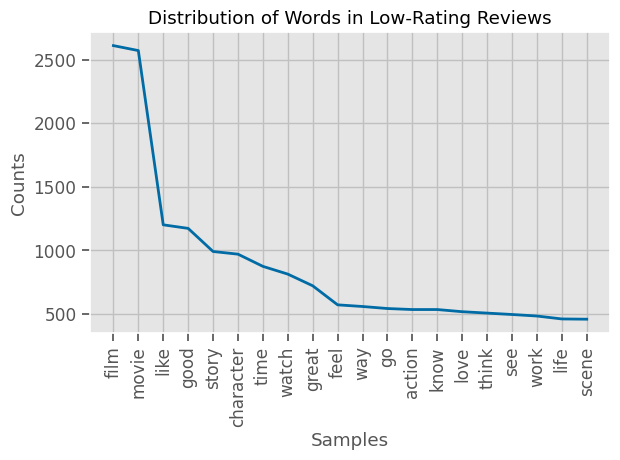

In [59]:
# Split the lemmas into individual token words
# low_review_lemmas_split = low_reviews_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
low_dist = FreqDist(high_review_lemmas_list)#(low_review_lemmas_split)
ax = low_dist.plot(20, show = False, title='Distribution of Words in Low-Rating Reviews')
plt.tight_layout()
# plt.savefig('Images/freq_dist_low_ratings.png')



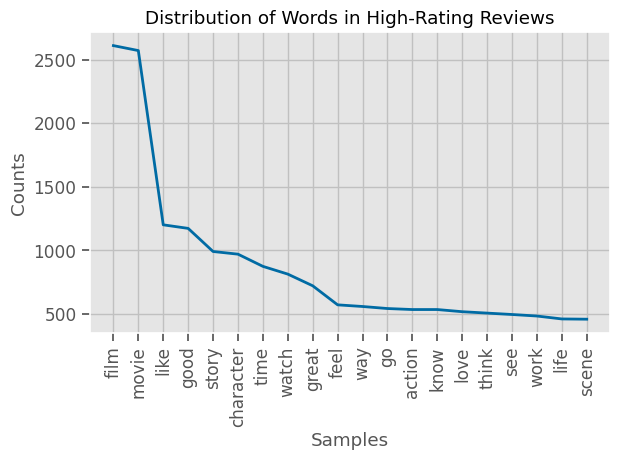

In [60]:
# Split the lemmas into individual token words
# high_review_lemmas_split = high_reviews_lemmas.split()
# Pass the tokenized lemmas to the class constructor and plot the distribution 
high_dist = FreqDist(high_review_lemmas_list)#high_review_lemmas_split)
ax = high_dist.plot(20, show = False, title='Distribution of Words in High-Rating Reviews')
plt.tight_layout()
# plt.savefig('Images/freq_dist_high_ratings.png')

### Admin Q: What would students do when they saw this?

- Would they want to go back and change their stopwords, if so, need to re-process all of the NLP text.

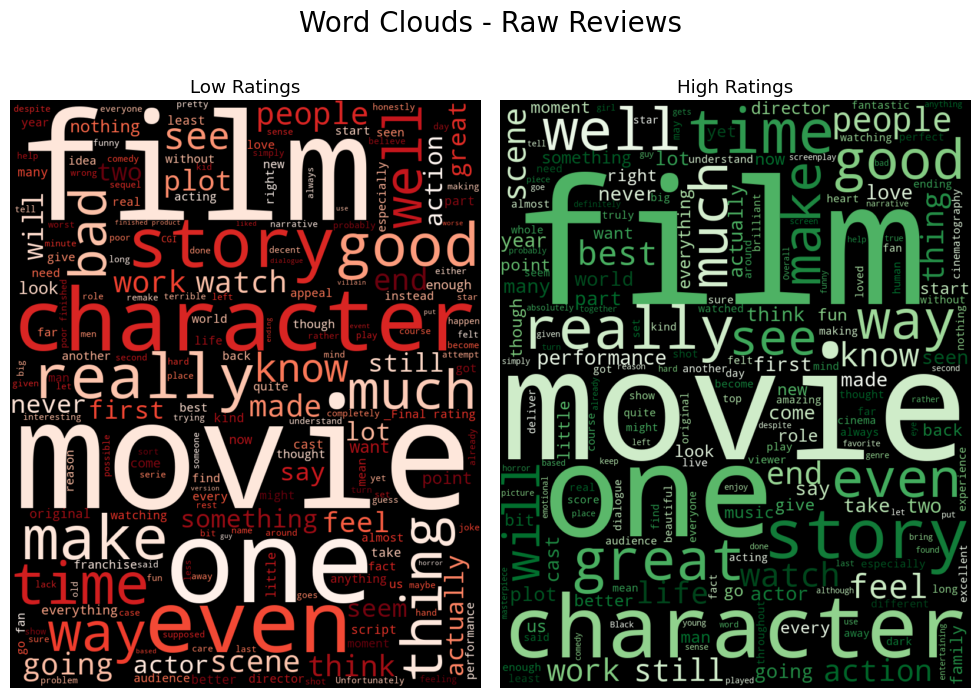

In [61]:
fig

## Ngram Analysis

### ✅TO DO: Remove Pre-function bigram code

In [62]:
import pandas as pd
import nltk
def get_ngram_measures_finder(tokens, ngrams=2, get_scores_df=False, measure='raw_freq', top_n=None, min_freq = 1,
                             words_colname='Words'):
    import nltk
    if ngrams == 4:
        MeasuresClass = nltk.collocations.QuadgramAssocMeasures
        FinderClass = nltk.collocations.QuadgramCollocationFinder
        
    elif ngrams == 3: 
        MeasuresClass = nltk.collocations.TrigramAssocMeasures
        FinderClass = nltk.collocations.TrigramCollocationFinder
    else:
        MeasuresClass = nltk.collocations.BigramAssocMeasures
        FinderClass = nltk.collocations.BigramCollocationFinder

    measures = MeasuresClass()
    
   
    finder = FinderClass.from_words(tokens)
    finder.apply_freq_filter(min_freq)
    if measure=='pmi':
        scored_ngrams = finder.score_ngrams(measures.pmi)
    else:
        measure='raw_freq'
        scored_ngrams = finder.score_ngrams(measures.raw_freq)

    df_ngrams = pd.DataFrame(scored_ngrams, columns=[words_colname, measure.replace("_",' ').title()])
    if top_n is not None:
        return df_ngrams.head(top_n)
    else:
        return df_ngrams



### Bigrams - Raw Frequency

- Doing the first set manually for demonstration.

In [63]:
# Getting bigrams low-reviews
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder_low = nltk.collocations.BigramCollocationFinder.from_words(low_review_tokens_list)
low_scored_ngrams = finder_low.score_ngrams( bigram_measures.raw_freq)

# Convert list of tuples to dataframe
df_bigram_scores_low = pd.DataFrame(low_scored_ngrams, columns=['Words','Frequency'])
df_bigram_scores_low.head(10)

# low_scored_ngrams[:10]

,Words,Frequency
0,"(final, rating)",0.001106
1,"(finished, product)",0.000829
2,"(appeal, poor)",0.000821
3,"(poor, finished)",0.000821
4,"(rating, things)",0.000821
5,"(things, appeal)",0.000821
6,"(special, effects)",0.000613
7,"(feels, like)",0.000544
8,"(avoid, possible)",0.000510
9,"(boring, disappointing)",0.000510


In [64]:
# Getting bigrams low-reviews
# measures = nltk.collocations.BigramAssocMeasures()
finder_high = nltk.collocations.BigramCollocationFinder.from_words(high_review_tokens_list)
high_scored_ngrams = finder_high.score_ngrams( bigram_measures.raw_freq)

# Convert list of tuples to dataframe
df_bigram_scores_high = pd.DataFrame(high_scored_ngrams, columns=['Words','Frequency'])
df_bigram_scores_high.head(10)
# high_scored_ngrams[:10]

,Words,Frequency
0,"(special, effects)",0.000429
1,"(comic, book)",0.000422
2,"(star, wars)",0.000394
3,"(feel, like)",0.000366
4,"(sci, fi)",0.000359
5,"(action, movie)",0.000323
6,"(real, life)",0.000316
7,"(john, wick)",0.000309
8,"(long, time)",0.000295
9,"(watch, movie)",0.000295


In [65]:
# Combine low and high reviews score dfs and add a group name as multi-index
df_compare_bigrams = pd.concat(
    [df_bigram_scores_high, df_bigram_scores_low],
    axis=1,
    keys=["High Rating Reviews", "Low Rating Reviews"],
)
top10_bigrams = df_compare_bigrams.head(10)
top10_bigrams

High Rating Reviews                 Low Rating Reviews          
                Words Frequency                    Words Frequency
0  (special, effects)  0.000429          (final, rating)  0.001106
1       (comic, book)  0.000422      (finished, product)  0.000829
2        (star, wars)  0.000394           (appeal, poor)  0.000821
3        (feel, like)  0.000366         (poor, finished)  0.000821
4           (sci, fi)  0.000359         (rating, things)  0.000821
5     (action, movie)  0.000323         (things, appeal)  0.000821
6        (real, life)  0.000316       (special, effects)  0.000613
7        (john, wick)  0.000309            (feels, like)  0.000544
8        (long, time)  0.000295        (avoid, possible)  0.000510
9      (watch, movie)  0.000295  (boring, disappointing)  0.000510

> Using df.to_markdown() to get a string with a Markdown table.

In [66]:
# Generating string table to insert into a Markdown cell or file
md_table_bigrams = df_compare_bigrams.head(10).to_markdown(index=False)
print(md_table_bigrams)

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000428964 | ('final', 'rating')               |                           0.00110584  |
| ('comic', 'book')                  |                            0.000421932 | ('finished', 'product')           |                           0.000829381 |
| ('star', 'wars')                   |                            0.000393803 | ('appeal', 'poor')                |                           0.000820741 |
| ('feel', 'like')                   |                            0.000365674 | ('poor', 'finished')              |                           0.000820741 |
| ('sci', 'fi')                      |                          

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000486304 | ('final', 'rating')               |                           0.00123491  |
| ('comic', 'book')                  |                            0.000470359 | ('finished', 'product')           |                           0.000926185 |
| ('sci', 'fi')                      |                            0.00039861  | ('appeal', 'poor')                |                           0.000916537 |
| ('star', 'wars')                   |                            0.000390637 | ('poor', 'finished')              |                           0.000916537 |
| ('action', 'movie')                |                            0.000366721 | ('rating', 'things')              |                           0.000916537 |
| ('feel', 'like')                   |                            0.000358749 | ('things', 'appeal')              |                           0.000916537 |
| ('john', 'wick')                   |                            0.000342804 | ('special', 'effects')            |                           0.000627104 |
| ('watch', 'movie')                 |                            0.00032686  | ('avoid', 'possible')             |                           0.00055957  |
| ('long', 'time')                   |                            0.000302943 | ('boring', 'disappointing')       |                           0.00055957  |
| ('real', 'life')                   |                            0.000302943 | ('disappointing', 'avoid')        |                           0.00055957  |

In [67]:
# Demonstrating how the string will display in markdown:
from IPython.display import Markdown
Markdown(md_table_bigrams)

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000428964 | ('final', 'rating')               |                           0.00110584  |
| ('comic', 'book')                  |                            0.000421932 | ('finished', 'product')           |                           0.000829381 |
| ('star', 'wars')                   |                            0.000393803 | ('appeal', 'poor')                |                           0.000820741 |
| ('feel', 'like')                   |                            0.000365674 | ('poor', 'finished')              |                           0.000820741 |
| ('sci', 'fi')                      |                            0.000358642 | ('rating', 'things')              |                           0.000820741 |
| ('action', 'movie')                |                            0.000323481 | ('things', 'appeal')              |                           0.000820741 |
| ('real', 'life')                   |                            0.000316449 | ('special', 'effects')            |                           0.000613396 |
| ('john', 'wick')                   |                            0.000309417 | ('feels', 'like')                 |                           0.000544281 |
| ('long', 'time')                   |                            0.000295352 | ('avoid', 'possible')             |                           0.000509724 |
| ('watch', 'movie')                 |                            0.000295352 | ('boring', 'disappointing')       |                           0.000509724 |

In [68]:
# saving the markdown table to a .md file
fname_bigram_freq = "Images/bigrams-raw-freq.md"
with open(fname_bigram_freq, 'w') as f:
    f.write(md_table_bigrams)

In [69]:
# Testing the saved table
with open(fname_bigram_freq) as f:
    display(Markdown(f.read()))

| ('High Rating Reviews', 'Words')   |   ('High Rating Reviews', 'Frequency') | ('Low Rating Reviews', 'Words')   |   ('Low Rating Reviews', 'Frequency') |
|:-----------------------------------|---------------------------------------:|:----------------------------------|--------------------------------------:|
| ('special', 'effects')             |                            0.000428964 | ('final', 'rating')               |                           0.00110584  |
| ('comic', 'book')                  |                            0.000421932 | ('finished', 'product')           |                           0.000829381 |
| ('star', 'wars')                   |                            0.000393803 | ('appeal', 'poor')                |                           0.000820741 |
| ('feel', 'like')                   |                            0.000365674 | ('poor', 'finished')              |                           0.000820741 |
| ('sci', 'fi')                      |                            0.000358642 | ('rating', 'things')              |                           0.000820741 |
| ('action', 'movie')                |                            0.000323481 | ('things', 'appeal')              |                           0.000820741 |
| ('real', 'life')                   |                            0.000316449 | ('special', 'effects')            |                           0.000613396 |
| ('john', 'wick')                   |                            0.000309417 | ('feels', 'like')                 |                           0.000544281 |
| ('long', 'time')                   |                            0.000295352 | ('avoid', 'possible')             |                           0.000509724 |
| ('watch', 'movie')                 |                            0.000295352 | ('boring', 'disappointing')       |                           0.000509724 |

### Bigrams - PMI

In [70]:
# Set the desired minimum frequency value, top-n and measure
bigram_kws = dict(measure='pmi',top_n =10 , min_freq=10)

# Get group bigrams
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**bigram_kws,
                                                words_colname="Bigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**bigram_kws,
                                              words_colname= "Bigrams (Low Ratings)")

# Concatenate and save top 10
df_compare_bigrams = pd.concat(
    [df_bigrams_low_pmi,df_bigrams_high_pmi, ],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
top10_bigrams_pmi = df_compare_bigrams.head(10)
display(top10_bigrams_pmi)

md_table_bigrams_pmi = top10_bigrams_pmi.to_markdown(index=False)

# saving the markdown table to a .md file
fname_bigram_pmi = "Images/bigrams-pmi.md"
with open(fname_bigram_pmi, 'w') as f:
    f.write(md_table_bigrams_pmi)

with open(fname_bigram_pmi) as f:
    display(Markdown(f.read()))

,Bigrams (Low Ratings),Pmi,Bigrams (High Ratings),Pmi
0,"(del, toro)",13.498712,"(del, toro)",13.310237
1,"(gon, na)",13.013285,"(los, angeles)",13.210702
2,"(martial, arts)",12.695109,"(martial, arts)",13.069229
3,"(matthew, mcconaughey)",12.650715,"(guardians, galaxy)",12.892626
4,"(vin, diesel)",12.498712,"(gon, na)",12.795664
5,"(silver, lake)",12.230677,"(roger, deakins)",12.739081
6,"(hercule, poirot)",12.185690,"(willem, dafoe)",12.725275
7,"(suicide, squad)",12.142568,"(suicide, squad)",12.606630
8,"(oliver, stone)",11.918567,"(joon, ho)",12.542684
9,"(jurassic, park)",11.807178,"(blu, ray)",12.473736


| Bigrams (Low Ratings)      |     Pmi | Bigrams (High Ratings)   |     Pmi |
|:---------------------------|--------:|:-------------------------|--------:|
| ('del', 'toro')            | 13.4987 | ('del', 'toro')          | 13.3102 |
| ('gon', 'na')              | 13.0133 | ('los', 'angeles')       | 13.2107 |
| ('martial', 'arts')        | 12.6951 | ('martial', 'arts')      | 13.0692 |
| ('matthew', 'mcconaughey') | 12.6507 | ('guardians', 'galaxy')  | 12.8926 |
| ('vin', 'diesel')          | 12.4987 | ('gon', 'na')            | 12.7957 |
| ('silver', 'lake')         | 12.2307 | ('roger', 'deakins')     | 12.7391 |
| ('hercule', 'poirot')      | 12.1857 | ('willem', 'dafoe')      | 12.7253 |
| ('suicide', 'squad')       | 12.1426 | ('suicide', 'squad')     | 12.6066 |
| ('oliver', 'stone')        | 11.9186 | ('joon', 'ho')           | 12.5427 |
| ('jurassic', 'park')       | 11.8072 | ('blu', 'ray')           | 12.4737 |

### Trigrams - Raw Freq

In [71]:
# Set the desired minimum frequency value, top-n and measure
trigram_kws = dict(measure='raw_freq',top_n =10 , min_freq=10,
                  ngrams=3)
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**trigram_kws,
                                                words_colname="Trigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**trigram_kws,
                                              words_colname= "Trigrams (Low Ratings)")

df_compare_bigrams = pd.concat(
    [ df_bigrams_low_pmi,df_bigrams_high_pmi],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)


,Trigrams (Low Ratings),Raw Freq,Trigrams (High Ratings),Raw Freq
0,"(appeal, poor, finished)",0.000821,"(=, =, =)",0.000197
1,"(final, rating, things)",0.000821,"(spoiler, free, reviews)",0.000169
2,"(poor, finished, product)",0.000821,"(enjoy, reading, spoiler)",0.000162
3,"(rating, things, appeal)",0.000821,"(free, reviews, follow)",0.000162
4,"(things, appeal, poor)",0.000821,"(reading, spoiler, free)",0.000162
5,"(boring, disappointing, avoid)",0.000510,"(reviews, follow, blog)",0.000162
6,"(disappointing, avoid, possible)",0.000510,"(⭐, ⭐, ⭐)",0.000141
7,"(½, boring, disappointing)",0.000510,"(follow, blog, link)",0.000120
8,"(final, rating:, ½)",0.000501,"(thin, red, line)",0.000084
9,"(rating:, ½, boring)",0.000492,"(bong, joon, ho)",0.000077


### Trigrams - PMI

In [72]:
# Set the desired minimum frequency value, top-n and measure
trigram_kws = dict(measure='pmi',top_n =10 , min_freq=10,
                  ngrams=3)
df_bigrams_high_pmi =  get_ngram_measures_finder(high_review_tokens_list,**trigram_kws,
                                                words_colname="Trigrams (High Ratings)")
df_bigrams_low_pmi = get_ngram_measures_finder(low_review_tokens_list,**trigram_kws,
                                              words_colname= "Trigrams (Low Ratings)")

df_compare_bigrams = pd.concat(
    [ df_bigrams_low_pmi,df_bigrams_high_pmi],
    axis=1,
    # keys=["High Rating Reviews", "Low Rating Reviews"],
)
df_compare_bigrams.head(10)


,Trigrams (Low Ratings),Pmi,Trigrams (High Ratings),Pmi
0,"(jake, watt, read)",22.322173,"(bong, joon, ho)",24.534745
1,"(watt, read, jake)",22.322173,"(=, =, =)",23.532765
2,"(batman, v, superman)",21.950409,"(⭐, ⭐, ⭐)",23.294724
3,"(reviews, follow, blog)",21.293206,"(thin, red, line)",21.677741
4,"(value, avoid, costs)",21.241095,"(reviews, follow, blog)",21.670321
5,"(read, jake, article)",21.129528,"(follow, blog, link)",21.182996
6,"(reading, spoiler, free)",21.042720,"(reading, spoiler, free)",21.112076
7,"(jake, article, link)",20.749497,"(john, wick, chapter)",20.667942
8,"(enjoy, reading, spoiler)",20.384509,"(enjoy, reading, spoiler)",20.434004
9,"(follow, blog, link)",20.280727,"(spoiler, free, reviews)",20.383399


## Sentiment Analysis

Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.  
- Compare the sentiments of high-rating and low-rating texts.  
- Compare the average scores for high and low-rating reviews.  
- Which review polarity scores don't match the ratings?  Why do you think this is?

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/codingdojo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [75]:
df.head(2)

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,target,length
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,"[better, then, the, original, i, think, was, pretty, funny, i, thought, the, comedy, was, better, then, the, original, too]","[better, original, think, pretty, funny, thought, comedy, better, original]","[well, original, think, pretty, funny, think, comedy, well, original]",better then the original i think was pretty funny i thought the comedy was better then the original too,better original think pretty funny thought comedy better original,well original think pretty funny think comedy well original,<NA>,19
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,"[kind, of, boring, it, 's, a, good, plot, and, storyline, nothing, really, to, keep, you, interested]","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline nothing really to keep you interested,kind boring good plot storyline interested,kind boring good plot storyline interested,<NA>,15


In [76]:
df['sentiment_scores'] = df['review_text'].map(sia.polarity_scores)
# Convert the column of dictionaries into separate columns
vader_scores = df['sentiment_scores'].apply(pd.Series)
# Join the new DataFrame with the original DataFrame
df_sentiment = pd.concat([df, vader_scores], axis=1).drop('sentiment_scores', axis=1)
df_sentiment

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,target,length,neg,neu,pos,compound
0,100042,64a3999fe9da6900c763aa8d,7.0,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,2023-07-04 04:01:35.517000+00:00,Better then the original I think. Was pretty funny. I thought the comedy was better then the original too.,"[better, then, the, original, i, think, was, pretty, funny, i, thought, the, comedy, was, better, then, the, original, too]","[better, original, think, pretty, funny, thought, comedy, better, original]","[well, original, think, pretty, funny, think, comedy, well, original]",better then the original i think was pretty funny i thought the comedy was better then the original too,better original think pretty funny thought comedy better original,well original think pretty funny think comedy well original,<NA>,19,0.000,0.345,0.655,0.9517
1,10008,643d44864d67910469d853a2,5.0,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,2023-04-17 13:07:18.832000+00:00,Kind of boring. It's a good plot and storyline. Nothing really to keep you interested.,"[kind, of, boring, it, 's, a, good, plot, and, storyline, nothing, really, to, keep, you, interested]","[kind, boring, good, plot, storyline, interested]","[kind, boring, good, plot, storyline, interested]",kind of boring it 's a good plot and storyline nothing really to keep you interested,kind boring good plot storyline interested,kind boring good plot storyline interested,<NA>,15,0.122,0.582,0.296,0.5106
2,10009,5f22bd2b43999b00355b26a6,7.0,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ...",2020-07-30 12:29:31.310000+00:00,"Heartwarming, if not as impactful as it intends to be.\r\n\r\n'Brother Bear' leaves heartfelt feelings and features a cute story. It does get a bit too melancholic in moments where it doesn't need to be or where it's not set up perfectly. It can ...","[heartwarming, if, not, as, impactful, as, it, intends, to, be, brother, bear, leaves, heartfelt, feelings, and, features, a, cute, story, it, does, get, a, bit, too, melancholic, in, moments, where, it, does, n't, need, to, be, or, where, it, 's...","[heartwarming, impactful, intends, brother, bear, leaves, heartfelt, feelings, features, cute, story, bit, melancholic, moments, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, o...","[heartwarme, impactful, intend, brother, bear, leave, heartfelt, feeling, feature, cute, story, bit, melancholic, moment, need, set, perfectly, feel, little, predictable, twist, decent, animation, wise, fine, early, aspect, ratio, stuff, oddly, v...",heartwarming if not as impactful as it intends to be brother bear leaves heartfelt feelings and features a cute story it does get a bit too melancholic in moments where it does n't need to be or where it 's not set up perfectly it can also feel a...,heartwarming impactful intends brother bear leaves heartfelt feelings features cute story bit melancholic moments need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despit...,heartwarme impactful intend brother bear leave heartfelt feeling feature cute story bit melancholic moment need set perfectly feel little predictable twist decent animation wise fine early aspect ratio stuff oddly voice cast amazing despite talen...,<NA>,140,0.082,0.745,0.173,0.9382
3,10009,6592736214956560f7da631f,7.0,"""Kenai"" is a young Inuit warrior who disturbs the spirits when he kills a bear. His punishment is to be turned into one himself, and be left to wander the wilderness alone. Luckily, he encou

In [77]:
# Define filter for positive reviews
pos_sentiment_reviews = df_sentiment['compound'] > 0
pos_sentiment_reviews.sum()

5979

In [78]:
filter_mismatch_A = (df['target'] == "Bad") & pos_sentiment_reviews
filter_mismatch_A.sum()

0

In [79]:
# Define filter for negative reviews
neg_sentiment_reviews = df_sentiment['compound'] < 0
neg_sentiment_reviews.sum()

1720

In [80]:
filter_mismatch_B = (df['target'] == "High") & neg_sentiment_reviews
filter_mismatch_B.sum()

133

In [81]:
df_sentiment.loc[filter_mismatch_B]

,movie_id,review_id,rating,review_text,created_at,review_text_raw,tokens-dirty,tokens,lemmas,tokens-dirty-joined,tokens-joined,lemmas-joined,target,length,neg,neu,pos,compound
50,10133,5d2267ef94d8a8498444676d,10.0,A very unique spy / corporate espionage film. I don't want to give too much away due to the way the plot unfolds. This movie is one of those hidden gems that many look over or miss; don't be one of those people!,2019-07-07 21:45:19.893000+00:00,A very unique spy / corporate espionage film. I don't want to give too much away due to the way the plot unfolds. This movie is one of those hidden gems that many look over or miss; don't be one of those people!,"[a, very, unique, spy, corporate, espionage, film, i, do, n't, want, to, give, too, much, away, due, to, the, way, the, plot, unfolds, this, movie, is, one, of, those, hidden, gems, that, many, look, over, or, miss, do, n't, be, one, of, those, p...","[unique, spy, corporate, espionage, film, want, away, way, plot, unfolds, movie, hidden, gems, look, miss, people]","[unique, spy, corporate, espionage, film, want, away, way, plot, unfold, movie, hide, gem, look, miss, people]",a very unique spy corporate espionage film i do n't want to give too much away due to the way the plot unfolds this movie is one of those hidden gems that many look over or miss do n't be one of those people,unique spy corporate espionage film want away way plot unfolds movie hidden gems look miss people,unique spy corporate espionage film want away way plot unfold movie hide gem look miss people,High,43,0.076,0.924,0.000,-0.2764
228,10625,5cb07e609251412fb023c6f6,9.0,"_Mean Girls_ has absolutely no business being as phenomenal as it is. None at all. If you've read many enough my reviews to get any sort of indication as to the sort of cinema I am in to, then you could be forgiven for assuming I wouldn't be a fa...",2019-04-12 12:02:40.265000+00:00,"_Mean Girls_ has absolutely no business being as phenomenal as it is. None at all. If you've read many enough my reviews to get any sort of indication as to the sort of cinema I am in to, then you could be forgiven for assuming I wouldn't be a fa...","[mean, girls, has, absolutely, no, business, being, as, phenomenal, as, it, is, none, at, all, if, you, 've, read, many, enough, my, reviews, to, get, any, sort, of, indication, as, to, the, sort, of, cinema, i, am, in, to, then, you, could, be, ...","[mean, girls, absolutely, business, phenomenal, read, reviews, sort, indication, sort, cinema, forgiven, assuming, fan, mean, girls, far, away, wheelhouse, movie, conceivably, fucking, love, honestly, tell, single, piece, mean, girls, examined, i...","[mean, girls, absolutely, business, phenomenal, read, review, sort, indication, sort, cinema, forgive, assume, fan, mean, girls, far, away, wheelhouse, movie, conceivably, fucking, love, honestly, tell, single, piece, mean, girls, examine, isolat...",mean girls has absolutely no business being as phenomenal as it is none at all if you 've read many enough my reviews to get any sort of indication as to the sort of cinema i am in to then you could be forgiven for assuming i would n't be a fan a...,mean girls absolutely business phenomenal read reviews sort indication sort cinema forgiven assuming fan mean girls far away wheelhouse movie conceivably fucking love honestly tell single piece mean girls examined isolation despise trope formula ...,mean girls absolutely business phenomenal read review sort indication sort cinema forgive assume fan mean girls far away wheelhouse movie conceivably fucking love honestly tell single piece mean girls examine isolation despise trope formula forma...,High,170,0.093,0.847,0.060,-0.5465
319,1085661,63e922889512e1007940b809,10.0,"Hard to do Good is a nice concept film whereby the gangsters kidnapped the businessman and stole all his money. They smacked and kicked him. And they left him half dead in the forest \r\nthinking he's dead. When the night comes, the gangster lead...",2

## Part 3 (coming soon!)

# APPENDIX